In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def MaxMinNorm10(df):
    df_nom = ((df - df.min())/(df.max()-df.min()))*10
    return df_nom

%matplotlib inline
#panda is a read/write tool

train_file = "c:\\house\\train.csv"
test_file = "c:\\house\\test.csv"

# comma delimited is the default
hsData = pd.read_csv(train_file, header = 0)
hsTest = pd.read_csv(test_file, header = 0)

In [16]:
numeric_features = hsData.select_dtypes(include=[np.number])
numeric_features.dtypes

corr = numeric_features.corr()

#print (corr['SalePrice'].sort_values(ascending=False)[:30], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-30:])

TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [ ]:
null_data = pd.DataFrame(hsData.isnull().sum().sort_values(ascending=False)[:20])
null_data.columns = ["Null Count"]
null_data.index.name = "Feature"
print null_data

null_data = pd.DataFrame(hsTest.isnull().sum().sort_values(ascending=False)[:35])
null_data.columns = ["Null Count"]
null_data.index.name = "Feature"
print null_data

In [17]:
def DrawBar(data_name):
    d_bar = hsData.pivot_table(index=data_name, values="SalePrice", aggfunc=np.median)

    d_bar_sorted = d_bar.sort_values(by="SalePrice")
    d_bar_sorted.plot(kind="bar", color="blue")

    plt.xlabel(data_name)
    plt.ylabel('SalePrice')
    plt.show()
    
    print('Count of Values')
    print hsData[data_name].value_counts()
    print('\nPercentage of Values')
    print hsData[data_name].value_counts()/hsData[data_name].count()
    
    
    d_size = d_bar_sorted.size
    idStr = d_bar_sorted.iloc[:d_size].index
    idVal = d_bar_sorted.values
        
    strIdx = '['
    for ele in idStr:
        if len(strIdx) > 2:
            strIdx += ','    
        strIdx += "\'"
        strIdx += str(ele)
        strIdx += "\'"

    strIdx += ']'
    print strIdx

    strVal = '['
    for ele in idVal:
        if len(strVal) > 2:
            strVal += ','          
        strVal += str(int(ele))
    strVal +=']'
        
    print strVal

In [ ]:
DrawBar('MSZoning')

#hsData['MSZoning'].replace(['C (all)','RM','RH','RL','FV'], [74700,120500,136500,174000,205950], inplace=True)

In [ ]:
DrawBar('MSSubClass')

#hsData['MSSubClass'].replace(['180','30','45','190','50','90','85','40','160','70','20','75','80','120','60'], [88500,99900,107500,128250,132000,135980,140750,142500,146000,156000,159250,163500,166500,192000,215200], inplace=True)

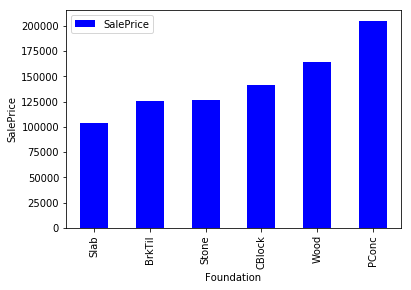

Count of Values
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Percentage of Values
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64
['Slab','BrkTil','Stone','CBlock','Wood','PConc']
[104150,125250,126500,141500,164000,205000]


In [20]:
DrawBar('Foundation')

#hsData['Foundation'].replace(['Slab','BrkTil','Stone','CBlock','Wood','PConc'], [104150,125250,126500,141500,164000,205000], inplace=True)

In [ ]:
# Too flat
DrawBar('LotConfig')

#hsData['LotConfig'].replace(['Inside','Corner','FR2','FR3','CulDSac'], [159697,160000,165000,195450,199262], inplace=True)

In [ ]:
DrawBar('LotShape')

#hsData['LotShape'].replace(['Reg','IR1','IR3','IR2'], [146000,189000,203570,221000], inplace=True)

In [ ]:
hsData['BsmtExposure'] = hsData['BsmtExposure'].fillna('NA')
DrawBar('BsmtExposure')

#hsData['BsmtExposure'].replace(['NA','No','Mn','Av','Gd'], [104025,154000,182450,185850,226975], inplace=True)

In [ ]:
hsTest['BsmtExposure'] = hsTest['BsmtExposure'].fillna('NA')
hsTest['BsmtExposure'].replace(['NA','No','Mn','Av','Gd'], [104025,154000,182450,185850,226975], inplace=True)
hsTest['BsmtExposure'].unique()

In [ ]:
hsData['BsmtFinType1'] = hsData['BsmtFinType1'].fillna('NA')
DrawBar('BsmtFinType1')

#hsData['BsmtFinType1'].replace(['NA','LwQ','BLQ','Rec','ALQ','Unf','GLQ'], [101800,139000,139100,142000,149250,161750,213750], inplace=True)

In [ ]:
hsData['BsmtFinType2'] = hsData['BsmtFinType2'].fillna('NA')
DrawBar('BsmtFinType2')

#hsData['BsmtFinType2'].replace(['NA','BLQ','Rec','LwQ','Unf','ALQ','GLQ'], [104025,143000,148750,154000,167000,174900,203125], inplace=True)

In [ ]:
hsTest['BsmtFinType2'] = hsTest['BsmtFinType2'].fillna('NA')
hsTest['BsmtFinType2'].replace(['NA','BLQ','Rec','LwQ','Unf','ALQ','GLQ'], [104025,143000,148750,154000,167000,174900,203125], inplace=True)
hsTest['BsmtFinType2'].unique()

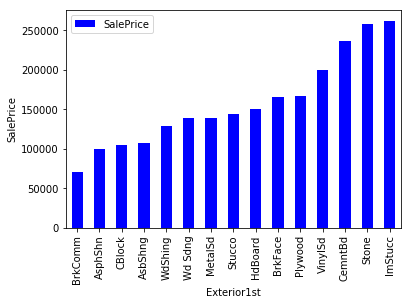

Count of Values
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

Percentage of Values
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
Stone      0.001370
BrkComm    0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64
['BrkComm','AsphShn','CBlock','AsbShng','WdShing','Wd Sdng','MetalSd','Stucco','HdBoard','BrkFace','Plywood','VinylSd','CemntBd','Stone','ImStucc']
[71000,100000,105000,108000,128700,138943,139000,144000,149900,165750,167450,200000,236500,258500,262000]


In [19]:
DrawBar('Exterior1st')

#hsData['Exterior1st'].replace(['BrkComm','AsphShn','CBlock','AsbShng','WdShing','Wd Sdng','MetalSd','Stucco','HdBoard','BrkFace','Plywood','VinylSd','CemntBd','Stone','ImStucc'], [71000,100000,105000,108000,128700,138943,139000,144000,149900,165750,167450,200000,236500,258500,262000], inplace=True)

In [ ]:
DrawBar('Exterior2nd')

#hsData['Exterior2nd'].replace(['CBlock','AsbShng','Wd Sdng','Wd Shng','MetalSd','AsphShn','Stucco','Brk Cmn','HdBoard','BrkFace','Plywood','Stone','ImStucc','VinylSd','CmentBd','Other'], [105000,111000,138000,138225,138750,139000,142000,147000,155000,160000,160750,177000,187600,200070,238750,319000], inplace=True)


In [ ]:
DrawBar('HouseStyle')

#hsData['HouseStyle'].replace(['1.5Unf','1.5Fin','2.5Unf','SFoyer','1Story','SLvl','2Story','2.5Fin'], [111250,132000,133900,135960,154750,164500,190000,194000], inplace=True)

In [ ]:
DrawBar('Fence')

In [ ]:
DrawBar('KitchenQual')

#hsData['KitchenQual'].replace(['Fa','TA','Gd','Ex'], [115000,137000,201400,316750], inplace=True)

In [ ]:
DrawBar('OverallQual')

#hsData['OverallQual'].replace([1,2,3,4,5,6,7,8,9,10], [50150,60000,86250,108000,133000,160000,200141,269750,345000,432390], inplace=True)

In [ ]:
DrawBar('OverallCond')

#hsData['OverallCond'].replace([1,2,3,4,8,6,7,9,5], [61000,85000,89500,115000,142500,142750,145000,176200,185000], inplace=True)

In [ ]:
hsData['Overall_Composite'] = hsData['OverallQual'] + hsData['OverallCond']
DrawBar('Overall_Composite')

#hsData['OverallCond'].replace([4,2,5,6,7,8,9,10,11,12,13,14,16,17,15,19], [39300,61000,68250,74500,92900,93000,115000,129500,146900,179470,230000,247200,250250,299800,310000,400000], inplace=True)

In [ ]:
hsTest = pd.read_csv(test_file, header = 0)

#3 = 4
hsTest['Overall_Composite'] = hsTest['OverallQual'] + hsTest['OverallCond']
hsTest['Overall_Composite'].replace([3,4,2,5,6,7,8,9,10,11,12,13,14,16,17,15,19], [39300,39300,61000,68250,74500,92900,93000,115000,129500,146900,179470,230000,247200,250250,299800,310000,400000], inplace=True)
print hsTest['Overall_Composite'].unique()

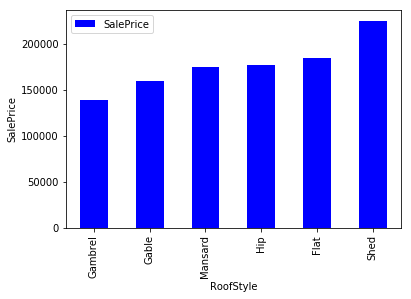

Count of Values
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

Percentage of Values
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64
['Gambrel','Gable','Mansard','Hip','Flat','Shed']
[139000,160000,175000,176500,185000,225000]


In [18]:
DrawBar('RoofStyle')

#hsData['RoofStyle'].replace(['Gambrel','Gable','Mansard','Hip','Flat','Shed'], [139000,160000,175000,176500,185000,225000], inplace=True)

In [ ]:
DrawBar('RoofMatl')

#hsData['RoofMatl'].replace(['Roll','ClyTile','CompShg','Tar&Grv','Metal','Membran','WdShake','WdShngl'], [137000,160000,162000,167000,180000,241500,242000,332500], inplace=True)

In [ ]:
DrawBar('Neighborhood')

#hsData['Neighborhood'].replace(['MeadowV','IDOTRR','BrDale','OldTown','Edwards','BrkSide','Sawyer','Blueste','SWISU','NAmes','NPkVill','Mitchel','SawyerW','Gilbert','NWAmes','Blmngtn','CollgCr','ClearCr','Crawfor','Veenker','Somerst','Timber','StoneBr','NoRidge','NridgHt'], \
#[88000,103000,106000,119000,121750,124300,135000,137500,139500,140000,146000,153500,179900,181000,182900,191000,197200,200250,200624,218000,225500,228475,278000,301500,315000], inplace=True)

In [ ]:
# Skewed 0.86
DrawBar('SaleType')

#hsData['SaleType'].replace(['Oth','ConLI','COD','ConLD','ConLw','WD','CWD','New','Con'], [116050,125000,139000,140000,144000,158000,188750,247453,269600], inplace=True)

In [ ]:
# Skewed, 0.82
DrawBar('SaleCondition')

#hsData['SaleCondition'].replace(['AdjLand','Abnorml','Family','Alloca','Normal','Partial'], [104000,130000,140500,148145,160000,244600], inplace=True)

In [ ]:
# Skewed, 0.94
DrawBar('LandSlope')

#hsData['LandSlope'].replace(['Gtl','Sev','Mod'], [161875,185000,186700], inplace=True)

In [ ]:
# Skewed 0.89
DrawBar('LandContour')

#hsData['LandContour'].replace(['Bnk','Lvl','Low','HLS'], [139400,162900,190000,222250], inplace=True)

In [ ]:
#Skewed 0.98
DrawBar('Heating')

#hsData['Heating'].replace(['Floor','Grav','Wall','OthW','GasW','GasA'], [72500,79000,91450,125750,134950,164500], inplace=True)

In [ ]:
DrawBar('HeatingQC')

#hsData['HeatingQC'].replace(['Po','Fa','TA','Gd','Ex'], [87000,123500,135000,152000,194700], inplace=True)

In [ ]:
DrawBar('MasVnrType')

#hsData['MasVnrType'].replace(['BrkCmn','None','BrkFace','Stone'], [139000,143000,181000,246839], inplace=True)

In [ ]:
# Skewed, 0.9999
DrawBar('Utilities')

In [ ]:

hsData['Fireplaces'] = hsData['Fireplaces'].apply(lambda x: 1 if x>0 else 0)
DrawBar('Fireplaces')
#hsData['Fireplaces'].replace([0,1], [135000,191000], inplace=True)

In [ ]:
DrawBar('FireplaceQu')

In [ ]:

DrawBar('PoolArea')

In [ ]:
DrawBar('Street')

In [ ]:
# Skewed, 0.91
DrawBar('Electrical')

#hsData['Electrical'].replace(['Mix','FuseP','FuseF','FuseA','SBrkr'], [67000,82000,115000,121250,170000], inplace=True)

In [ ]:
#Too many missing data
DrawBar('MiscFeature')

In [ ]:
##Too many missing data because it links to MiscFeature
DrawBar('MiscVal')

In [ ]:
#Skew 0.86
DrawBar('Condition1')

#hsData['Condition1'].replace(['Artery','Feedr','RRAe','Norm','RRAn','RRNe','PosN','PosA','RRNn'], [119550,140000,142500,166500,171495,190750,200000,212500,214000], inplace=True)

In [ ]:
#Skewed 0.98
DrawBar('Condition2')

#hsData['Condition2'].replace(['RRNn','Artery','Feedr','RRAn','Norm','RRAe','PosN','PosA'], [96750,106500,127500,136905,163500,190000,284875,325000], inplace=True)

In [ ]:
#Skew 0.93
DrawBar('CentralAir')


In [ ]:
# Skewed, 0.98
DrawBar('RoofMatl')

#hsData['RoofMatl'].replace(['Roll', 'ClyTile', 'CompShg', 'Tar&Grv', 'Metal', 'Membran', 'WdShake', 'WdShngl'], [137000,160000,162000,167000,180000,241500,242000,332500], inplace=True)

In [ ]:
#skewed 0.93
DrawBar('Functional')

#hsData['Functional'].replace(['Maj2','Sev','Mod','Min1','Min2','Maj1','Typ'], [85000,129000,137900,139000,140000,140750,165500], inplace=True)

In [ ]:
#Skewed 0.83
DrawBar('BldgType')

#hsData['BldgType'].replace(['2fmCon','Duplex','Twnhs','1Fam','TwnhsE'], [127500,135980,137500,167900,172200], inplace=True)

In [ ]:
import seaborn as sns

num_train_features = hsData.select_dtypes(include=[np.number])
num_train_features.dtypes

num_train_features = num_train_features.drop(['Id'], axis=1)

ncol = 3
nrow = 12
for i in range(nrow):
    fg,ax=plt.subplots(nrows=1,ncols=ncol,figsize=(9,5))
    for j in range(ncol):
        sns.violinplot(y = num_train_features.iloc[:,(i*ncol+j)],ax=ax[j])

In [ ]:
hsData['GarageQual'] = hsData['GarageQual'].fillna('NA')
DrawBar('GarageQual')

#hsData['GarageQual'].replace(['Po','NA','Fa','Ex','TA','Gd'], [96500,100000,115000,127500,170000,209115], inplace=True)

In [ ]:
hsTest = pd.read_csv(test_file, header = 0)
hsTest['GarageQual'] = hsTest['GarageQual'].fillna('NA')
hsTest['GarageQual'].replace(['Po','NA','Fa','Ex','TA','Gd'], [96500,100000,115000,127500,170000,209115], inplace=True)

print hsTest['GarageQual'].unique()

In [ ]:
hsData['GarageCond'] = hsData['GarageCond'].fillna('NA')

DrawBar('GarageCond')
#hsData['GarageCond'].replace(['NA','Po','Fa','Ex','Gd','TA'], [100000,108000,114504,124000,148000,170000], inplace=True)

In [ ]:
hsData['GarageQual'] = hsData['GarageQual'].fillna('NA')
hsData['GarageCond'] = hsData['GarageCond'].fillna('NA')
hsData['Garage_Composite'] = hsData['GarageQual'] + hsData['GarageCond']

DrawBar('Garage_Composite')

'''
hsData['Garage_Composite'].replace(['PoPo','NANA','FaFa','FaPo','FaTA','ExEx','TAFa','TAGd','TATA','GdTA','GdGd','ExTA'], \
                             [96500,100000,109750,114500,117250,124000,125000,144000,171000,209115,227485,475000], inplace=True)
'''

In [ ]:
hsTest = pd.read_csv(test_file, header = 0)

hsTest['GarageQual'] = hsTest['GarageQual'].fillna('NA')
hsTest['GarageCond'] = hsTest['GarageCond'].fillna('NA')
hsTest['Garage_Composite'] = hsTest['GarageQual'] + hsTest['GarageCond']

#'PoFa'='PoPo'
#'GdEx'='GdGd'
#'TAPo'='TAFa'
hsTest['Garage_Composite'].replace(['PoPo','PoFa','NANA','FaFa','FaPo','FaTA','ExEx','TAFa','TAPo','TAGd','TATA','GdTA','GdGd','GdEx','ExTA'], \
                             [96500,96500,100000,109750,114500,117250,124000,125000,125000,144000,171000,209115,227485,227485,475000], inplace=True)

print hsTest['Garage_Composite'].unique()

In [ ]:
hsData['GarageFinish'] = hsData['GarageFinish'].fillna('NA')
DrawBar('GarageFinish')

#hsData['GarageFinish'].replace(['NA','Unf','RFn','Fin'], [100000,135000,190000,215000], inplace=True)

In [ ]:
hsTest = pd.read_csv(test_file, header = 0)
hsTest['GarageFinish'] = hsTest['GarageFinish'].fillna('NA')

hsTest['GarageFinish'].replace(['NA','Unf','RFn','Fin'], [100000,135000,190000,215000], inplace=True)
print hsTest['GarageFinish'].unique()

In [ ]:
DrawBar('GarageCars')

#hsData['GarageCars'].replace([0,1,2,4,3], [100000,128000,177750,200000,295000], inplace=True)

In [ ]:
hsTest = pd.read_csv(test_file, header = 0)
hsTest['GarageCars'] = hsTest['GarageCars'].fillna(0)
#5 = 4
hsTest['GarageCars'].replace([0,1,2,4,5,3], [100000,128000,177750,200000,200000,295000], inplace=True)
print hsTest['GarageCars'].unique()

In [ ]:
hsData['GarageType'] = hsData['GarageType'].fillna('NA')
DrawBar('GarageType')

#hsData['GarageType'].replace(['NA','CarPort','Detchd','Basment','2Types','Attchd','BuiltIn'], [100000,108000,129500,148000,159000,185000,227500], inplace=True)

In [ ]:
hsTest = pd.read_csv(test_file, header = 0)
hsTest['GarageType'] = hsTest['GarageType'].fillna('NA')

hsTest['GarageType'].replace(['NA','CarPort','Detchd','Basment','2Types','Attchd','BuiltIn'], [100000,108000,129500,148000,159000,185000,227500], inplace=True)
print hsTest['GarageType'].unique()

In [ ]:
for idx in range(0,1459):
    if hsTest['GarageYrBlt'].iloc[idx] > 2200:
        hsTest['GarageYrBlt'].iloc[idx] = hsTest['GarageYrBlt'].iloc[idx] - 200

hsTest['GarageYrBlt'] = hsTest['GarageYrBlt'].fillna(0)
print hsTest['GarageYrBlt'].unique()

In [ ]:
hsData_year_trim = hsData.copy()
hsData_year_trim['GarageYrBlt'] = hsData_year_trim['GarageYrBlt'].fillna(0)
#hsData_year_trim = hsData_year_trim[hsData_year_trim["GarageYrBlt"] > 0]

plt.scatter(x=hsData_year_trim['GarageYrBlt'], y=np.log(hsData_year_trim['SalePrice']))
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Original construction date")
plt.show()

print hsData['GarageYrBlt'].unique()

In [ ]:
DrawBar('ExterQual')

In [ ]:
DrawBar('ExterCond')

In [ ]:
hsData['Exter_Composite'] = hsData['ExterQual'] + hsData['ExterCond']

DrawBar('Exter_Composite')

'''
hsData['Exter_Composite'].replace(['FaFa','TAPo','FaTA','TAFa','TAEx','TATA','TAGd','GdGd','GdTA','ExGd','ExEx','ExTA'], \
                             [60500,76500,99000,118732,139500,139950,140000,210000,221000,266500,325000,374189], inplace=True)
'''

In [ ]:
hsTest['ExterQual'] = hsTest['ExterQual'].fillna('TA')
hsTest['ExterCond'] = hsTest['ExterCond'].fillna('TA')
hsTest['Exter_Composite'] = hsTest['ExterQual'] + hsTest['ExterCond']

# 'GdEx' = 'GdTA'
# 'FaPo' = 'FaFa'
# 'GdFa' = 'GdGd'
# 'FaGd' = 'FaTA'
hsTest['Exter_Composite'].replace(['FaPo','FaFa','TAPo','FaGd','FaTA','TAFa','TAEx','TATA','TAGd','GdFa','GdGd','GdTA','GdEx','ExGd','ExEx','ExTA'], \
                             [60500,60500,76500,99000,99000,118732,139500,139950,140000,210000,210000,221000,221000,266500,325000,374189], inplace=True)

print hsTest['Exter_Composite'].unique()

In [ ]:
tmp_hsData = hsData.copy()

msc_bar = hsData.pivot_table(index="MSZoning", values="SalePrice", aggfunc=np.median)

msc_bar_sorted = msc_bar.sort_values(by="SalePrice")

for i, item in enumerate(msc_bar_sorted.index):
    tmp_hsData.loc[tmp_hsData['MSZoning'] == msc_bar_sorted.index[i],'MSZoning'] = msc_bar_sorted.values[i]
    
tmp_hsData['MSZoning'] = pd.to_numeric(tmp_hsData['MSZoning'], errors='coerce')    
print tmp_hsData['MSZoning']


In [ ]:
hsData['BsmtQual'] = hsData['BsmtQual'].fillna('NA')

DrawBar('BsmtQual')

In [ ]:
hsData['BsmtCond'] = hsData['BsmtCond'].fillna('NA')

DrawBar('BsmtCond')

In [ ]:
hsData['BsmtQual'] = hsData['BsmtQual'].fillna('NA')
hsData['BsmtCond'] = hsData['BsmtCond'].fillna('NA')
hsData['Bsmt_Composite'] = hsData['BsmtQual'] + hsData['BsmtCond']

DrawBar('Bsmt_Composite')

'''
hsData['Bsmt_Composite'].replace(['FaPo','NANA','FaTA','FaFa','TAFa','TATA','TAGd','GdFa','GdTA','GdGd','ExGd','ExTA'], \
                             [64000,101800,112000,114875,117000,135625,164500,182500,192000,199000,274725,318030], inplace=True)
'''

In [ ]:
#Not useful, too many zeros
hsData_vnr_trim = hsData[hsData["MasVnrArea"] < 10000]
#hsData_vnr_trim = hsData_vnr_trim[hsData_flr_trim["MasVnrArea"] > 500]

plt.scatter(x=hsData_vnr_trim["MasVnrArea"], y=np.log(hsData_vnr_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Masonry veneer area square feet")
plt.show()


In [ ]:
hsTest = pd.read_csv(test_file, header = 0)

hsTest['BsmtQual'] = hsTest['BsmtQual'].fillna('NA')
hsTest['BsmtCond'] = hsTest['BsmtCond'].fillna('NA')

for idx in range(0,1459):
    if hsTest['BsmtQual'].iloc[idx] == 'NA':
        if hsTest['BsmtCond'].iloc[idx] != 'NA':
            hsTest['BsmtCond'].iloc[idx] = 'NA'
        if hsTest['BsmtExposure'].iloc[idx] != 'NA':
            hsTest['BsmtExposure'].iloc[idx] = 'NA'            
        if hsTest['BsmtFinType1'].iloc[idx] != 'NA':
            hsTest['BsmtFinType1'].iloc[idx] = 'NA' 
        if hsTest['BsmtFinType2'].iloc[idx] != 'NA':
            hsTest['BsmtFinType2'].iloc[idx] = 'NA'             
        if hsTest['BsmtFinSF1'].iloc[idx] != 0:
            hsTest['BsmtFinSF1'].iloc[idx] = 0 
        if hsTest['BsmtFinSF2'].iloc[idx] != 0:
            hsTest['BsmtFinSF2'].iloc[idx] = 0             
        if hsTest['BsmtUnfSF'].iloc[idx] != 0:
            hsTest['BsmtUnfSF'].iloc[idx] = 0 
        if hsTest['TotalBsmtSF'].iloc[idx] != 0:
            hsTest['TotalBsmtSF'].iloc[idx] = 0 
            
for idx in range(0,1459):
    if hsTest['BsmtCond'].iloc[idx] == 'NA':
        if hsTest['BsmtQual'].iloc[idx] != 'NA':
            #it's TA, not NA because NA could be a typo of TA
            hsTest['BsmtCond'].iloc[idx] = 'TA'
            
hsTest['Bsmt_Composite'] = hsTest['BsmtQual'] + hsTest['BsmtCond']

#'ExPo' = 'GdGd'
#'FaGd' = 'FaFa'
#'TAPo' = 'TAFa'
hsTest['Bsmt_Composite'].replace(['FaPo','NANA','FaTA','FaFa','FaGd','TAPo','TAFa','TATA','TAGd','GdFa','GdTA','GdGd','ExPo','ExGd','ExTA'], \
                             [64000,101800,112000,114875,114875,117000,117000,135625,164500,182500,192000,199000,199000,274725,318030], inplace=True)

print hsTest['Bsmt_Composite'].unique()

In [ ]:
# Living area, orignal
hsData_lv_trim = hsData
#hsData_lv_trim = hsData[hsData["GrLivArea"] < 3500]
hsData_lv_trim = hsData_lv_trim[hsData_lv_trim["GrLivArea"] > 400]
plt.scatter(x=hsData_lv_trim["GrLivArea"], y=hsData_lv_trim["SalePrice"])
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Above grade (ground) living area square feet")
plt.show()

In [ ]:
hsData['Qualified_SF'] = hsData['GrLivArea'] - hsData['LowQualFinSF']
hsData_qf_trim= hsData[hsData["Qualified_SF"] < 3500]
hsData_qf_trim= hsData_qf_trim[hsData_qf_trim["Qualified_SF"] > 500]
plt.scatter(x=np.log(hsData_qf_trim["Qualified_SF"]), y=np.log(hsData_qf_trim["SalePrice"]))
#plt.scatter(x=hsData_qf_trim["Qualified_SF"], y=np.log(hsData_qf_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Qualified area square feet")
plt.show()

In [ ]:
hsData_lt_trim = hsData
hsData_lt_trim = hsData[hsData["LotArea"] < 30000]

plt.scatter(x=np.log(hsData_lt_trim["LotArea"]), y=np.log(hsData_lt_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Size of lot in square feet")
plt.show()

#print hsData_lt_trim["LotArea"]

In [ ]:
hsData['Porch_SF'] = hsData['OpenPorchSF'] + hsData['EnclosedPorch'] + hsData['3SsnPorch'] + hsData['ScreenPorch']
hsData_pch_trim = hsData[hsData["Porch_SF"] < 600]

plt.scatter(x=hsData_pch_trim["Porch_SF"], y=np.log(hsData_pch_trim["SalePrice"]))
#plt.scatter(x=np.log(hsData_pch_trim["Porch_SF"]), y=np.log(hsData_pch_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Sale Price")
plt.xlabel("Size of porch in square feet")
plt.show()


In [ ]:
hsData_gar_trim = hsData.copy()
hsData_gar_trim = hsData[hsData["GarageArea"] < 1200]

hsData_gar_trim['GarageArea'] = MaxMinNorm10(hsData_gar_trim['GarageArea'])

plt.scatter(x=hsData_gar_trim["GarageArea"], y=np.log(hsData_gar_trim["SalePrice"]))
#plt.scatter(x=np.log(hsData_gar_trim["GarageArea"]), y=np.log(hsData_gar_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Size of garage in square feet")
plt.show()

#hsData_trim.info()

In [ ]:
hsData_bsmt_trim = hsData[hsData["TotalBsmtSF"] < 3000]
#hsData_bsmt_trim['TotalBsmtSF'] = hsData_bsmt_trim['TotalBsmtSF'].apply(lambda x: np.log(x) if x > 0 else 0)
hsData_bsmt_trim['TotalBsmtSF'] = MaxMinNorm10(hsData_bsmt_trim['TotalBsmtSF'])

#print hsData_bsmt_trim['TotalBsmtSF']

plt.scatter(x=hsData_bsmt_trim['TotalBsmtSF'], y=np.log(hsData_bsmt_trim['SalePrice']))
#plt.scatter(x=np.log(hsData_bsmt_trim['TotalBsmtSF']), y=np.log(hsData_bsmt_trim['SalePrice']))
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Basement Square feet")
plt.show()

In [ ]:
hsData_gar_trim = hsData#hsData[hsData["BsmtFinSF2"] < 1000]

plt.scatter(x=hsData_gar_trim["BsmtFinSF2"], y=np.log(hsData_gar_trim["SalePrice"]))
plt.grid(True)
plt.ylabel("Sale Price")
plt.xlabel("Size of garage in square feet")
plt.show()

In [ ]:
hsData_month = hsData.copy()
#hsData_year_shift['Year'] = hsData_year_shift['YearBuilt'].apply(lambda x: 2030 - x)
#hsData_year_shift = hsData_year_shift[hsData_year_shift["YearBuilt"] < 140]

plt.scatter(x=hsData_month['MoSold'], y=np.log(hsData_month['SalePrice']))
plt.grid(True)
plt.ylabel("Ln of Sale Price")
plt.xlabel("Original construction date")
plt.show()

In [ ]:
#Noise
cds_bar = hsData.pivot_table(index="Conditions", values="SalePrice", aggfunc=np.median)

cds_bar_sorted = cds_bar.sort_values(by="SalePrice")
cds_bar_sorted.plot(kind="bar", color="green")

plt.xlabel("condition 1+2")
plt.ylabel("sale price")
plt.show()

print cds_bar_sorted

'''
hsData['Conditions'].replace(['FeedrFeedr', 'FeedrRRNn', 'ArteryArtery', 'ArteryNorm', \
                              'RRNnFeedr', 'RRAnFeedr', 'FeedrRRAn', 'FeedrNorm', \
                             'RRAeNorm', 'NormNorm', 'RRAnNorm', 'FeedrRRAe', \
                             'RRNeNorm', 'PosNNorm', 'PosANorm', 'RRNnNorm', \
                             'PosNPosN', 'ArteryPosA'], \
                             [85000,96750,106500,119900,128000,133500,136905,141000,142500,166500,178950,190000,190750,200000,212500,252000,284875,325000], inplace=True)
'''

In [ ]:
hsData['Sold_Time'] = (hsData['YrSold'] - 2005)*12 + hsData['MoSold']

fn_bar = hsData.pivot_table(index="Sold_Time", values="SalePrice", aggfunc=np.median)

fn_bar_sorted = fn_bar.sort_values(by="SalePrice")
fn_bar_sorted.plot(kind="bar", color="blue")

plt.xlabel("Sold_Time")
plt.ylabel("sale price")
plt.show()

print fn_bar_sorted